In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic
## Optimisation

In [2]:
from scipy.optimize import minimize

Minimise $f(x) = (x-3)^2$

In [3]:
def f(x):
    return (x-3)**2

res = minimize(f, 2)

In [4]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

In [5]:
res.x

array([2.99999999])

Minimise $f(x,y) = (x-1)^2 + (y-2.5)^2$ subject to
$$
x-2y+2 \geq 0 \\
-x-2y+6 \geq 0 \\
-x+2y+2 \geq 0 \\
x \geq 0 \\
y \geq 0
$$

- 2D function takes in vector $x$
- Constraints must be spcified as $g_i(x) \geq 0 $
- Bounds specified as rectangular

In [9]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2}) # constraints (inequalities), a tuple of dictionaries
bnds = ((0, None), (0, None)) # bounds (lower and upper), a tuple of tuples
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [19]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

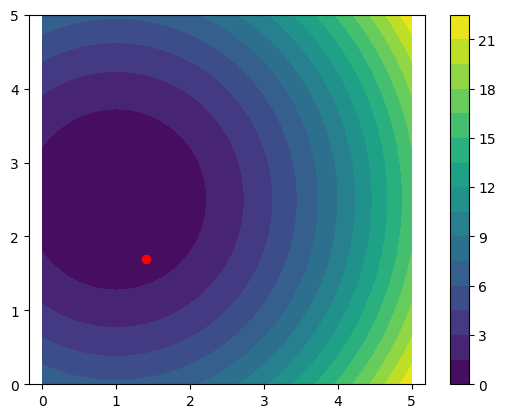

In [41]:
x = np.linspace(0, 5, 500)
y = np.linspace(0, 5, 500)
xv, yv = np.meshgrid(x, y)
zv = f([xv, yv])
plt.contourf(xv, yv, zv, 20)
plt.axis('equal')
plt.colorbar()
plt.plot(res.x[0], res.x[1], 'ro')


In [37]:
# minimize?

## Interpolation
Suppose you have the following data

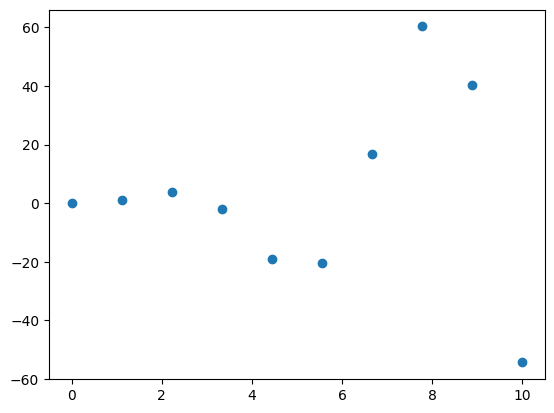

In [2]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

You want to know the values in between

In [3]:
from scipy.interpolate import interp1d

In [7]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

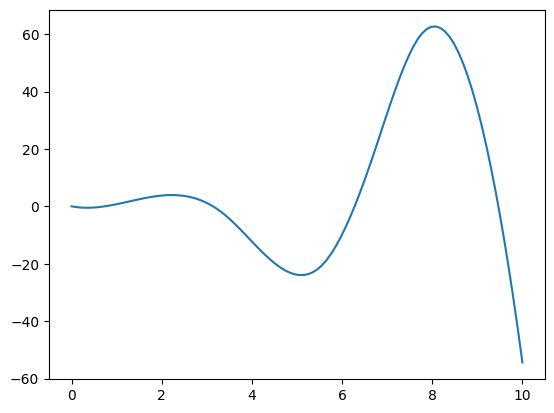

In [8]:
plt.plot(x_dense, y_dense)

# Curve Fitting
Trivial Example

In [11]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

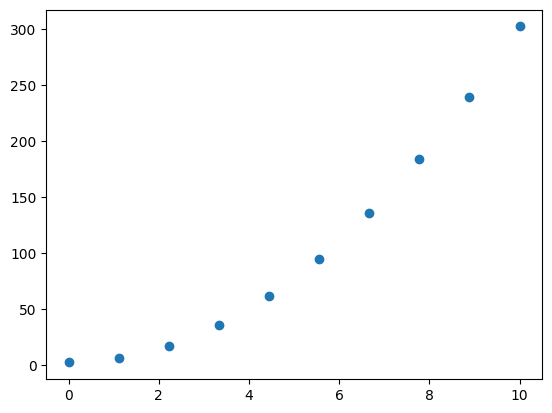

In [12]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $y = ax^2 + b$. The main goal here is to determine the values of $a$ and $b$

In [13]:
from scipy.optimize import curve_fit # curve fitting

def func(x, a, b):
    return a*x**2 + b  # function to fit

popt, pcov = curve_fit(func, x_data, y_data, p0=(1, 1)) # p0 is the initial guess for the parameters



In [15]:
pcov

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])